In [32]:
# import of modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Initialization of the base**

In [33]:
# Import and creation of dataframe for datasets
df = pd.read_csv("Dataset/Amazon Sale Report.csv")
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_8200\1387075244.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Dataset/Amazon Sale Report.csv")


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [34]:
# Standardizes column names: tiny + no space
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(df.columns.tolist())

['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel', 'ship-service-level', 'style', 'sku', 'category', 'size', 'asin', 'courier_status', 'qty', 'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'b2b', 'fulfilled-by', 'unnamed:_22']


## **Descriptive analysis**

In [35]:
# info you dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   order_id            128975 non-null  object 
 2   date                128975 non-null  object 
 3   status              128975 non-null  object 
 4   fulfilment          128975 non-null  object 
 5   sales_channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   style               128975 non-null  object 
 8   sku                 128975 non-null  object 
 9   category            128975 non-null  object 
 10  size                128975 non-null  object 
 11  asin                128975 non-null  object 
 12  courier_status      122103 non-null  object 
 13  qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  amount              121180 non-nul

In [36]:
# Check the missing data
df.isna().sum()

index                     0
order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship-service-level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
b2b                       0
fulfilled-by          89698
unnamed:_22           49050
dtype: int64

In [37]:
# Deletion of unnecessary columns
df = df.drop(['index', 'unnamed:_22', 'promotion-ids', 'fulfilled-by'], axis=1)
df.head()

,order_id,date,status,fulfilment,sales_channel,ship-service-level,style,sku,category,size,asin,courier_status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False


In [38]:
# Duplicate line
print(df.duplicated().sum())

6


In [39]:
# Delete duplicate lines
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [40]:
df.nunique()

order_id              120378
date                      91
status                    13
fulfilment                 2
sales_channel              2
ship-service-level         2
style                   1377
sku                     7195
category                   9
size                      11
asin                    7190
courier_status             3
qty                       10
currency                   1
amount                  1410
ship-city               8955
ship-state                69
ship-postal-code        9459
ship-country               1
b2b                        2
dtype: int64

In [41]:
# Delete lines without amount
df = df.dropna(subset=['amount'])

In [42]:
# Fill the missing values
df['courier_status'].fillna('Unknown', inplace=True)
df['currency'].fillna('INR', inplace=True)

geo_cols = ['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']
for col in geo_cols:
    df[col] = df[col].fillna('Unknown')

C:\Users\HP\AppData\Local\Temp\ipykernel_8200\421877863.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['courier_status'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8200\421877863.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [43]:
# Post-cleaning verification
df.isna().sum()

order_id              0
date                  0
status                0
fulfilment            0
sales_channel         0
ship-service-level    0
style                 0
sku                   0
category              0
size                  0
asin                  0
courier_status        0
qty                   0
currency              0
amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
b2b                   0
dtype: int64

### **Phase 1 – Data Cleaning & Descriptive Analysis**

In this first phase, I explored and cleaned a dataset of nearly 129,000 Amazon orders.

The raw data included several inconsistencies: missing values, duplicated rows, and redundant columns. Here's what was performed:

- Removed irrelevant or empty columns (`Unnamed: 22`, `promotion-ids`, etc.)
- Replaced missing values in key fields (`Courier Status`, `ship-city`, etc.)
- Dropped rows with missing critical values (`Amount`)
- Converted dates to datetime format
- Ensured consistency in data types
- Removed 6 exact duplicate rows

The dataset is now ready for deeper analysis (sales, customer behavior, geography, etc.)


## **Exploratory analysis**

In [44]:
# Dimensions you dataset
{df.shape[0]}, {df.shape[1]}

({121177}, {20})

In [45]:
# General digital statistics
df.describe()

,qty,amount
count,121177.000000,121177.000000
mean,0.961230,648.555776
std,0.214356,281.209851
min,0.000000,0.000000
25%,1.000000,449.000000
50%,1.000000,605.000000
75%,1.000000,788.000000
max,8.000000,5584.000000


In [46]:
# Statistics on Object columns (categorical)
print("Categorical columns -unique values :")
for col in df.select_dtypes(include='object').columns:
    print(f"→ {col}: {df[col].nunique()} unique values")

Categorical columns -unique values :
→ order_id: 113030 unique values
→ date: 91 unique values
→ status: 12 unique values
→ fulfilment: 2 unique values
→ sales_channel: 1 unique values
→ ship-service-level: 2 unique values
→ style: 1373 unique values
→ sku: 7157 unique values
→ category: 9 unique values
→ size: 11 unique values
→ asin: 7153 unique values
→ courier_status: 3 unique values
→ currency: 1 unique values
→ ship-city: 8705 unique values
→ ship-state: 69 unique values
→ ship-postal-code: 9274 unique values
→ ship-country: 2 unique values


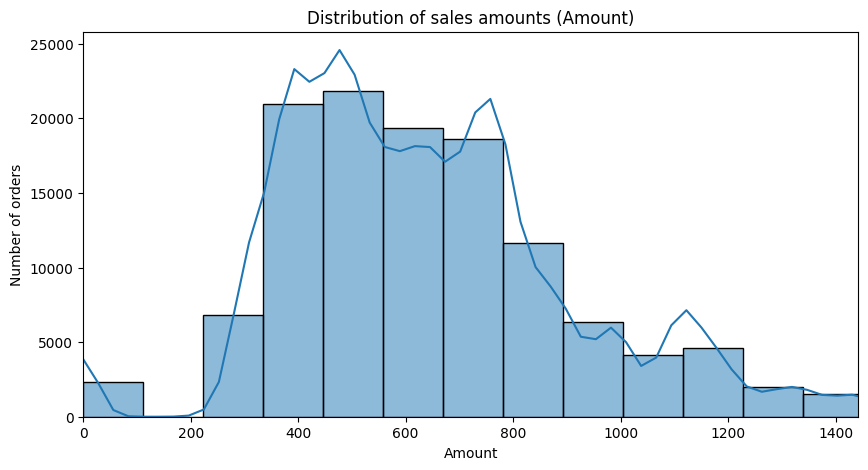

In [47]:
# Distribution of turnover
plt.figure(figsize=(10, 5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of sales amounts (Amount)")
plt.xlabel("Amount")
plt.ylabel("Number of orders")
plt.xlim(0, df['amount'].quantile(0.99))
plt.show()

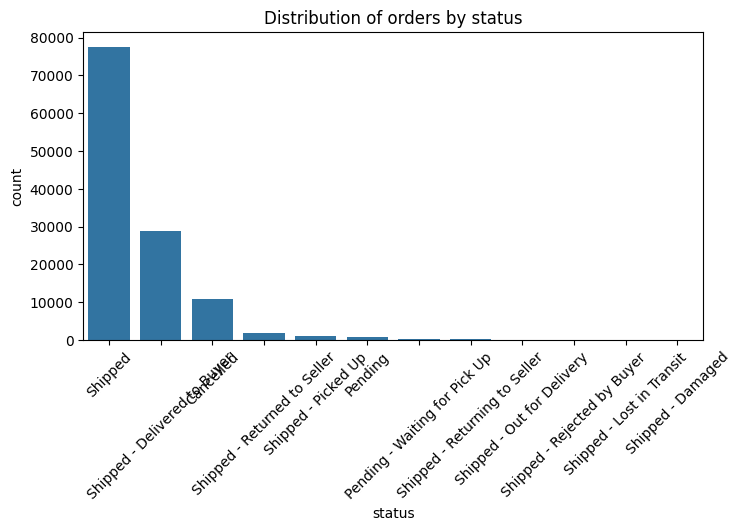

In [48]:
# Distribution of sales by status
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title("Distribution of orders by status")
plt.xticks(rotation=45)
plt.show()

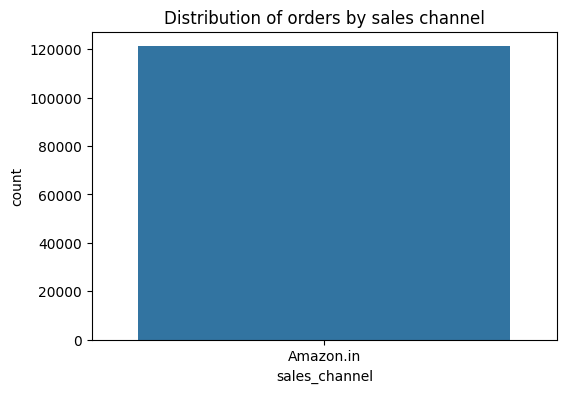

In [49]:
# Distribution by sales channel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sales_channel', order=df['sales_channel'].value_counts().index)
plt.title("Distribution of orders by sales channel")
plt.show()

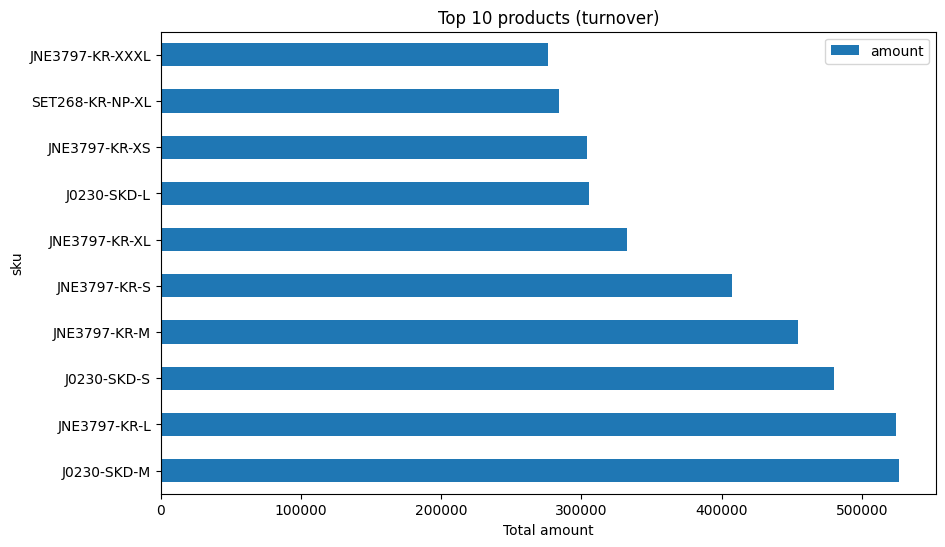

In [50]:
# Visualisation Monthly sales evolution
top_skus = (
    df.groupby('sku')[['amount']]
    .sum()
    .sort_values(by='amount', ascending=False)
    .head(10)
)
top_skus.plot(kind='barh', figsize=(10, 6), title="Top 10 products (turnover)")
plt.xlabel("Total amount")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_8200\2962870095.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


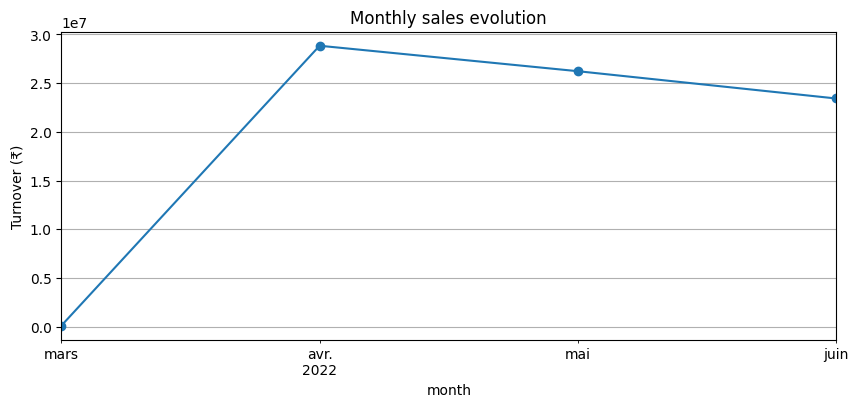

In [51]:
# Visualisation Monthly sales evolution
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['month'] = df['date'].dt.to_period('M')

monthly_sales = df.groupby('month')['amount'].sum()
monthly_sales.plot(kind='line', marker='o', figsize=(10, 4), title="Monthly sales evolution")
plt.ylabel("Turnover (₹)")
plt.grid(True)
plt.show()

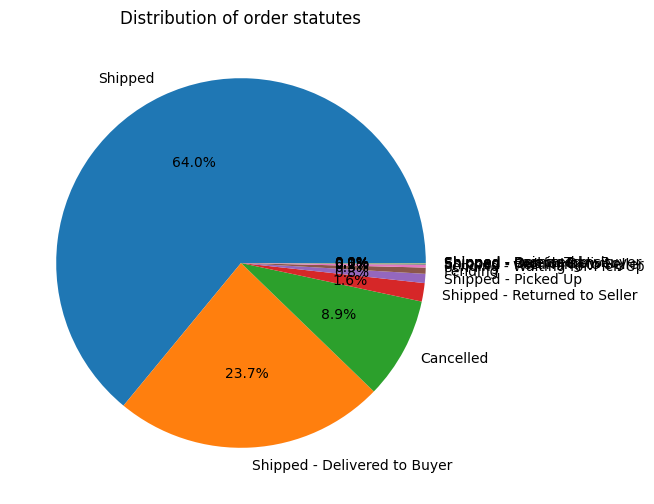

In [52]:
# Visualisation of distribution of order statutes
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), title='Distribution of order statutes')
plt.ylabel('')
plt.show()

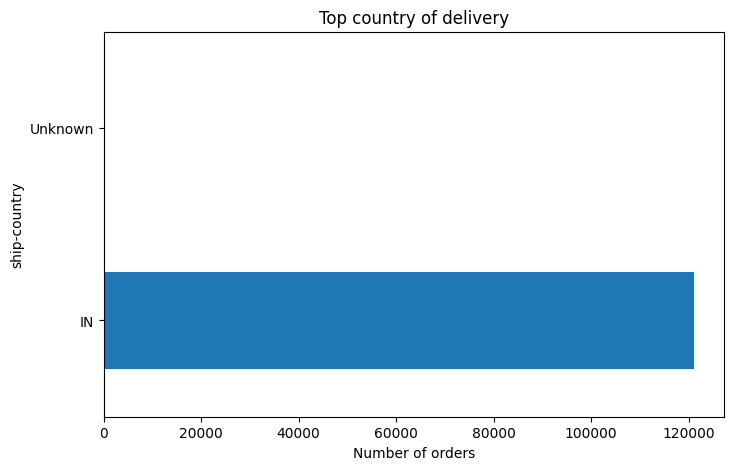

In [53]:
# Visualistaion of Top country in delivery
top_countries = df['ship-country'].value_counts().head(10)
top_countries.plot(kind='barh', title="Top country of delivery", figsize=(8, 5))
plt.xlabel("Number of orders")
plt.show()

### 📊 **Interpretations of exploratory charts**

---

#### 1. ***Distribution of sales amounts***

The majority of sales amounts are concentrated in a low range, with a peak around small orders. This indicates that sales are mainly made up of low-value transactions, which is typical of a B2C model.

However, the presence of a long tail on the right reveals some very high-value sales. These extreme values may correspond to bulk purchases or B2B orders.

**Monthly trend in sales** (in %)

This graph shows how sales evolve month by month.

It's easy to spot periods of high activity (sales peaks) as well as slack periods. These variations can be linked to :
- Promotional campaigns (e.g. festivals, seasonal sales)
- Stock or price adjustments
- Changes in customer behavior

    This distribution highlights the importance of small orders in terms of volume, but also the significant contribution of a few large sales.

---

#### 2. ***Distribution of order statuses***

The majority of orders are marked as “Delivered” or “Shipped”, indicating that the logistics process is functioning correctly for a large proportion of transactions.

However, a significant percentage of orders are cancelled or returned. This may reflect :
- Lack of product availability (stock)
- Customer dissatisfaction
- Delivery errors

    It may be useful to investigate these causes in a targeted analysis to reduce losses associated with unfinished orders.

---

#### 3. ***Distribution of orders by sales channel***

There is a high concentration of sales on one main channel (probably Amazon.in), while other channels are much less used.

This means that sales activity is heavily dependent on a single sales platform. This situation offers good visibility, but also represents a risk in the event of a change in algorithm, policy or competition.

    Diversification into other channels could improve business resilience and capture new customer segments.

## **Products analysis**

C:\Users\HP\AppData\Local\Temp\ipykernel_8200\2539685894.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products['amount'], palette='viridis')
C:\Users\HP\AppData\Local\Temp\ipykernel_8200\2539685894.py:15: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\HP\OneDrive\Documents\Cours_house\projets\PR3\PR3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


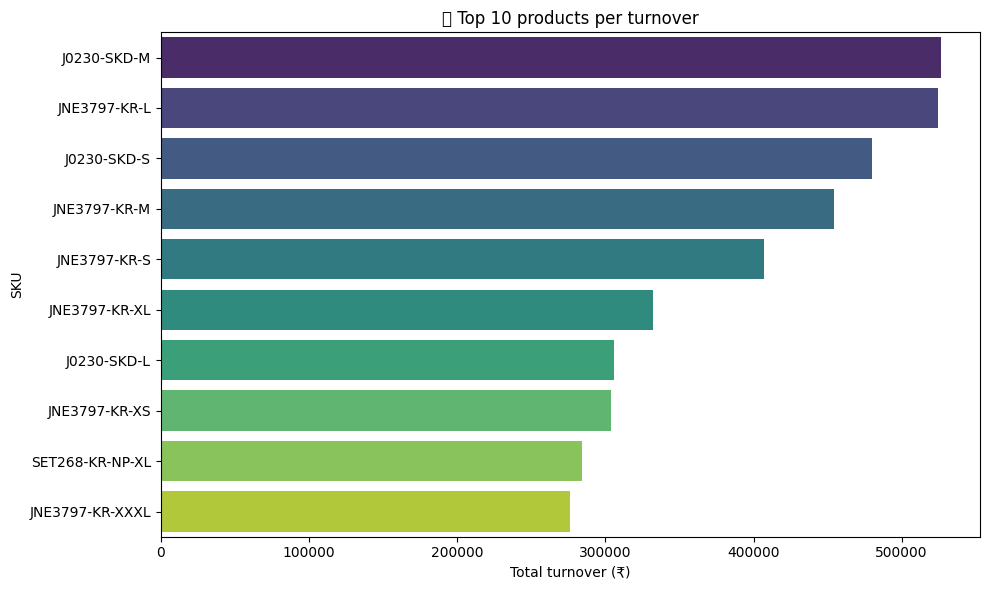

In [54]:
# Group the data by SKU and calculate total sales and quantities
top_products = (
    df.groupby('sku')[['qty', 'amount']]
    .sum()
    .sort_values(by='amount', ascending=False)
    .head(10)
)

# Visualization of the top 10 in turnover
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products['amount'], palette='viridis')
plt.title("💰 Top 10 products per turnover")
plt.xlabel("Total turnover (₹)")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_8200\2448778791.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products_qty.index, x=top_products_qty.values, palette='mako')


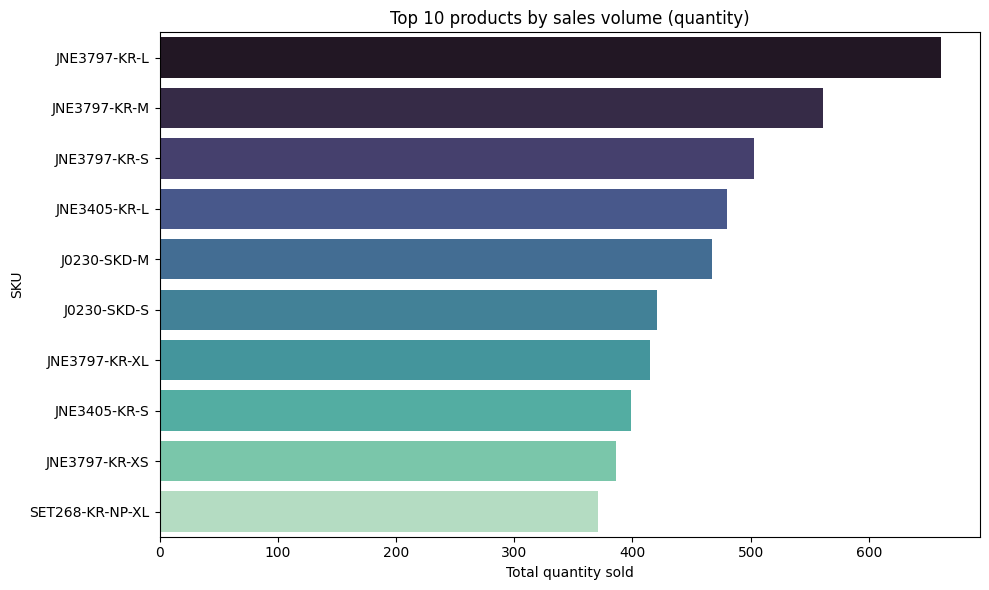

In [55]:
# Visualization of the top 10 in quantity
top_products_qty = (
    df.groupby('sku')['qty']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_products_qty.index, x=top_products_qty.values, palette='mako')
plt.title("Top 10 products by sales volume (quantity)")
plt.xlabel("Total quantity sold")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()

#### **📊 Interpretation - Top-performing products**

The two graphs show the top 10 products in the catalog :

- The first chart is based on the **total sales** generated by each SKU.
- The second chart ranks products by **total quantity sold**.

These analyses reveal :
- the most profitable products (even if their quantity is small)
- Popular products (those that sell in large quantities)

---
